# Flight Price Prediction_Project is a Regression Model

In [1]:
print(('*'*127))
print("                                                      Flight Price Prediction                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Flight Price Prediction                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel("FlightPrice_Data_Train.xlsx")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 11)


df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

* Here we that there is 10683 Rows and 11 Columns for this Dataset

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* Here we observe that majority of the Columns are of object type and Price is our Target variable

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Here we observe that we just have one Null row for Route and Total_stops columns

# Dataset Descirption

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



# Attributes

The Following are the attributes which signifies the further prediction of the Attrition levels:

-- (1) Age : The age of each individuals in the dataset

-- (2) BusinessTravel: Determining wether or not the person travels to often

-- (3) DailyRate: The dailyRate given to the individual

-- (4) Department: The department refers to his feild of proffession 

-- (5) DistanceFromHome: The distance of office to Home

-- (6) Education: The full education received by the individual

-- (7) EducationField: The feild of personel expertise by the individual

-- (8) EmployeeCount: The Count of the Employees based on Department

-- (9) EmployeeNumber: The No of employees of the company

-- (10) EnvironmentSatisfaction: The satisfaction level by the individual on the enviroment

-- (11) Gender: The type of sex the individual belongs to 

-- (12) HourlyRate: The Hourly pay scale of the employee

-- (13) JobInvolvement: The score of an individual based on the devotness to the jpb

-- (14) JobLevel: The level of difficulty of the job

-- (15) JobRole: The given job role by the company

-- (16) JobSatisfaction: The rate of job and enviroment satisfaction by an individual

-- (17) MaritalStatus: categorising the married, divorced or not married status

-- (18) RelationshipSatisfaction: The rate of satisfaction in the personel life

-- (19) StandardHours: The standard working hours of an individual

-- (20) StockOptionLevel: The right to purchase stocks from the company

-- (21) TotalWorkingYears: The No of years the individual has been working

-- (22) TrainingTimesLastYear: The No of training given to an individual for improval

-- (23) WorkLifeBalance: The Rate of an individual balancing work and life

-- (24) YearsAtCompany: The No of years at a given comapny

-- (25) YearsInCurrentRole: The No of years at the same job role

-- (26) YearsSinceLastPromotion: The last when an individual was promoted

-- (27) YearsWithCurrManager: The No of years with the present or previous manager

In [6]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [8]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [9]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → GOI → HYD                   1
BOM → DED → DEL → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → UDR → DEL → HYD             1
CCU → IXB → DEL → BLR             1
Name: Route, Length: 128, dtype: int64

In [10]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [11]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

# Data Cleaning

In [12]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [13]:
df['Route']=df['Route'].fillna(np.mean(df['Route'])) 

In [14]:
df['Total_Stops']=df['Total_Stops'].fillna(np.mean(df['Total_Stops'])) 

# Checking VIF ( Variance Inflation Factor )

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0


In [16]:
calculate_vif(F)

,F,VIF_Value
0,Airline,3.680788
1,Date_of_Journey,5.083168
2,Source,5.711208
3,Destination,3.032464
4,Route,7.904551
5,Dep_Time,3.913072
6,Arrival_Time,7.265884
7,Duration,4.409971
8,Total_Stops,2.322918
9,Additional_Info,21.507334


* Here we do not find any NaN or Single values for any column or and there is no multicolinearity

# Outlier Check and Removal

In [17]:
df1 = df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']]

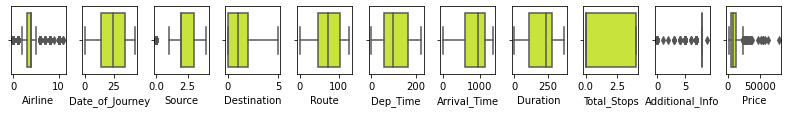

In [18]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='gist_ncar')
    plt.tight_layout()

In [19]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(10683, 11)

In [20]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

In [21]:
new_df.shape

(10578, 11)

# DataLoss %

In [22]:
Loss = (10683/10578)/10578*100

In [23]:
Loss

0.009547421649208907

* Here we observe a Datasloss of 0.009% after the Outlier check adnd removal

In [24]:
new_df['Airline'].value_counts()

4.0     3783
3.0     2053
1.0     1731
6.0     1186
8.0      816
10.0     479
0.0      319
2.0      194
7.0       13
11.0       3
9.0        1
Name: Airline, dtype: int64

In [25]:
new_df['Source'].value_counts()

2.0    4520
3.0    2870
0.0    2116
4.0     691
1.0     381
Name: Source, dtype: int64

In [26]:
new_df['Destination'].value_counts()

1.0    4520
0.0    2870
2.0    1265
5.0     851
3.0     691
4.0     381
Name: Destination, dtype: int64

In [27]:
new_df['Total_Stops'].value_counts()

0.000000    5541
4.000000    3488
1.000000    1502
2.000000      45
1.458248       1
3.000000       1
Name: Total_Stops, dtype: int64

In [28]:
new_df['Additional_Info'].value_counts()

8.0    8266
5.0    1982
7.0     320
4.0       6
6.0       3
9.0       1
Name: Additional_Info, dtype: int64

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Density'>

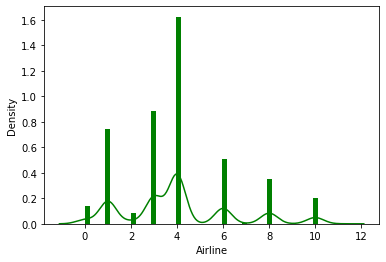

In [29]:
sn.distplot(new_df["Airline"], hist_kws={'alpha':1}, color='g')

* Here we observe a moderately skewed distribution of data

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Density'>

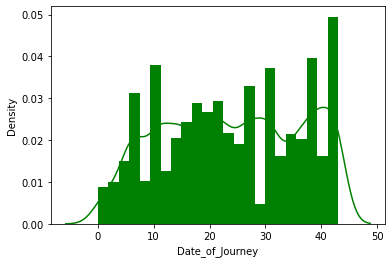

In [30]:
sn.distplot(new_df["Date_of_Journey"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Destination', ylabel='Density'>

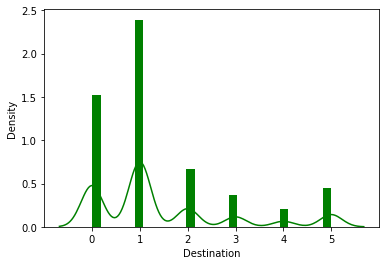

In [31]:
sn.distplot(new_df["Destination"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Route', ylabel='Density'>

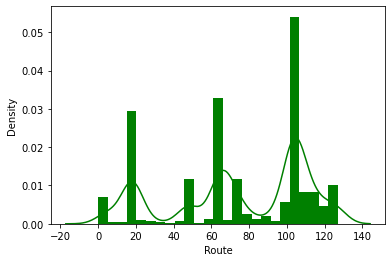

In [32]:
sn.distplot(new_df["Route"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed distribution of data

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

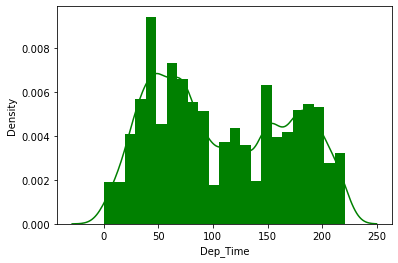

In [33]:
sn.distplot(new_df["Dep_Time"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

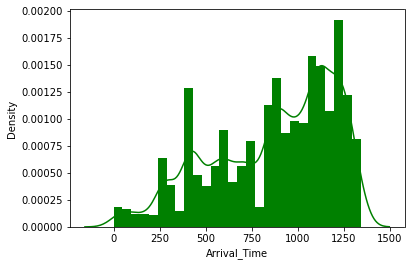

In [34]:
sn.distplot(new_df["Arrival_Time"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Duration', ylabel='Density'>

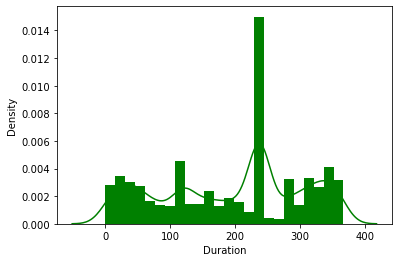

In [35]:
sn.distplot(new_df["Duration"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

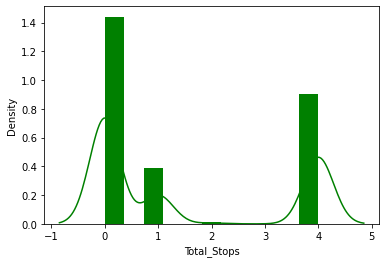

In [36]:
sn.distplot(new_df["Total_Stops"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

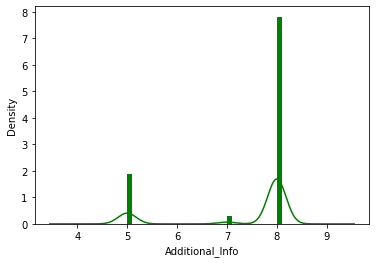

In [37]:
sn.distplot(new_df["Additional_Info"], hist_kws={'alpha':1}, color='g')

* Here we observe a highly skewed negative distribution of data

<AxesSubplot:xlabel='Price', ylabel='Density'>

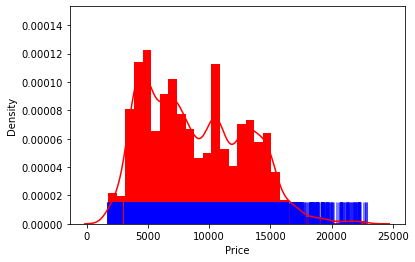

In [38]:
sn.distplot(new_df["Price"],bins=30,hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.1})

* Here we observe a good distribution of data

# Scatterplot

In [39]:
new_df.skew()

Airline            0.731709
Date_of_Journey   -0.061918
Source            -0.439204
Destination        1.269454
Route             -0.511232
Dep_Time           0.194141
Arrival_Time      -0.608273
Duration          -0.216095
Total_Stops        0.618088
Additional_Info   -1.533587
Price              0.411094
dtype: float64

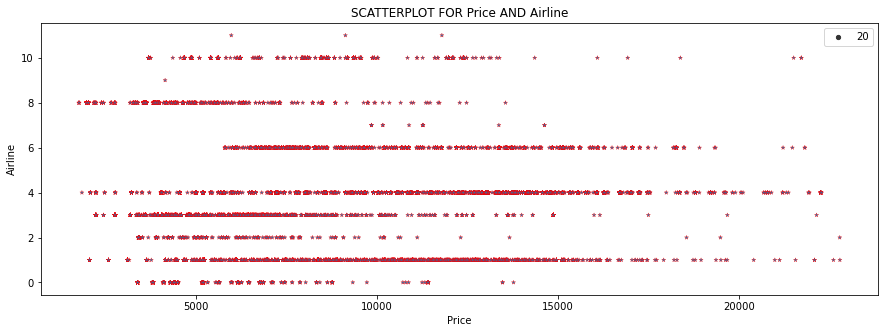

In [40]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Airline')

sn.scatterplot(new_df['Price'], new_df['Airline'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe AirlineNo 1(airIndia),6(multiple carriers) has majority distributed for all Prices data

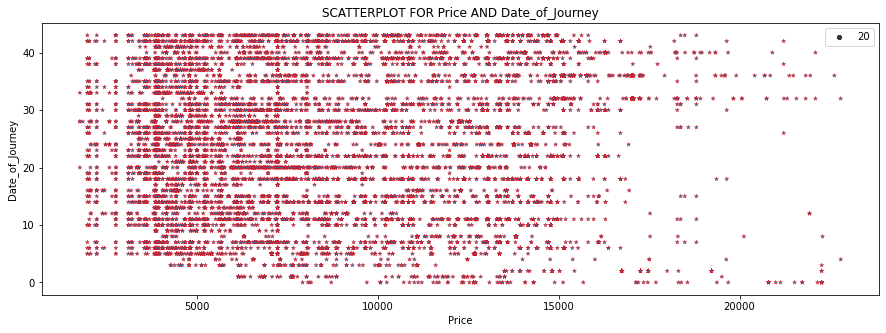

In [41]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Date_of_Journey')

sn.scatterplot(new_df['Price'], new_df['Date_of_Journey'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Date_of_Journey data is well distributed for all Prices

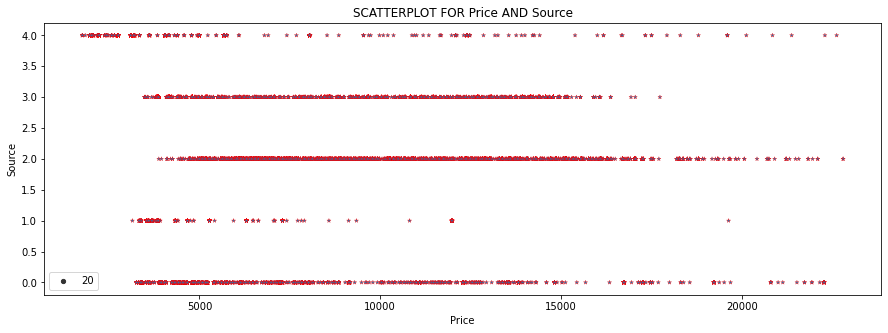

In [42]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Source')

sn.scatterplot(new_df['Price'], new_df['Source'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Source No 0(Banglore),2(Kolkota),3(Delhi) has majority distribution for all Price data

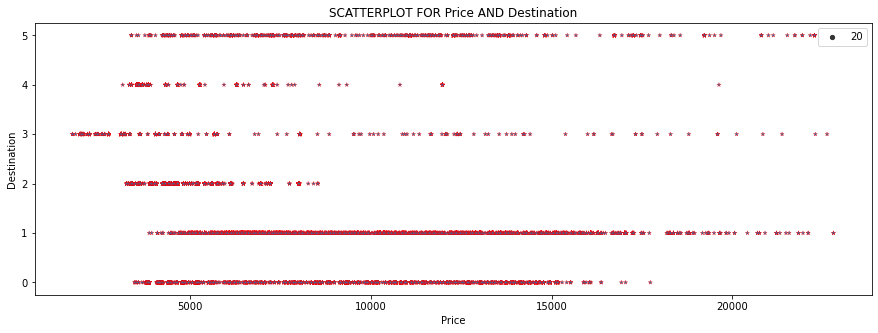

In [43]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Destination')

sn.scatterplot(new_df['Price'], new_df['Destination'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Destination 0(Banglore),1(Cochin),5(Delhi) has majority data distributed for all Prices data

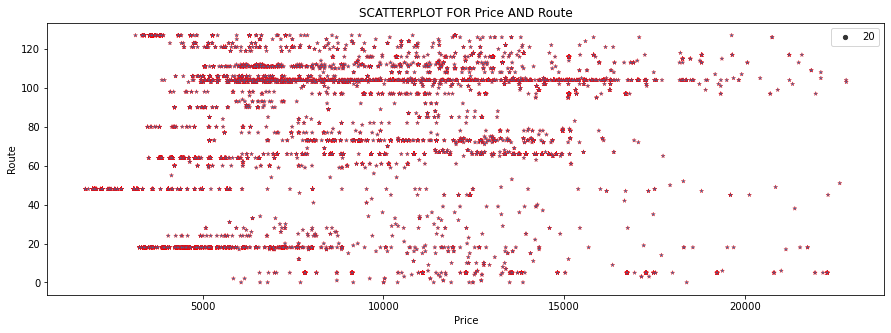

In [44]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Route')

sn.scatterplot(new_df['Price'], new_df['Route'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Route No 100 has majority of distribution for all Price data

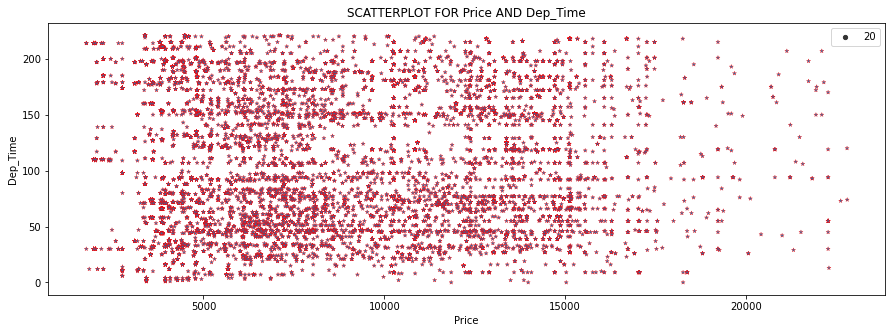

In [45]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Dep_Time')

sn.scatterplot(new_df['Price'], new_df['Dep_Time'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Dep_Time data is well distributed for all Prices data

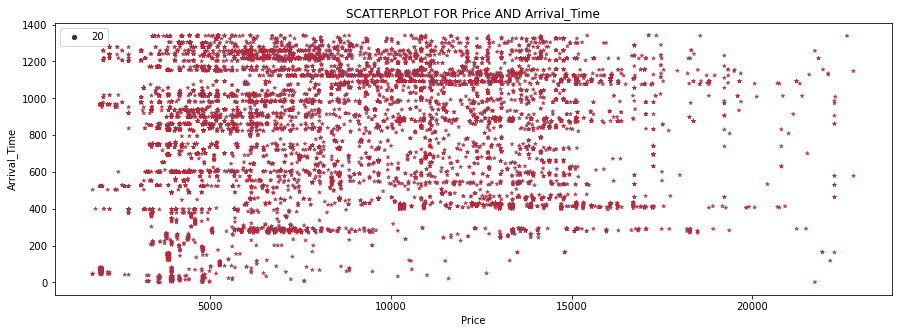

In [46]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Arrival_Time')

sn.scatterplot(new_df['Price'], new_df['Arrival_Time'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Arrival_Time data is well distributed for all Prices data

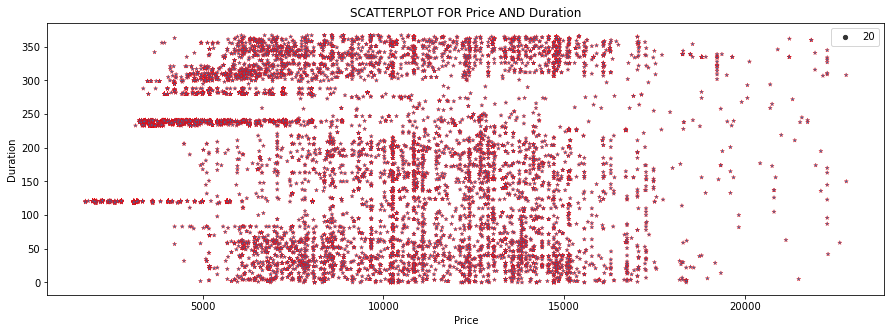

In [47]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Duration')

sn.scatterplot(new_df['Price'], new_df['Duration'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Duration data is well distributed for all Prices data

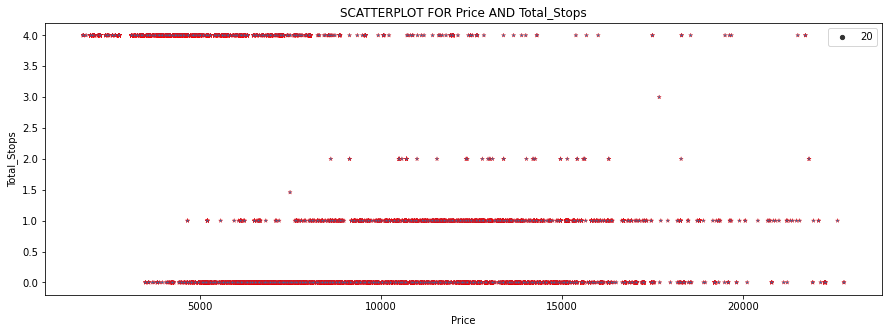

In [48]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Total_Stops')

sn.scatterplot(new_df['Price'], new_df['Total_Stops'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Total_Stops 0 has majority of distribution for all Prices data

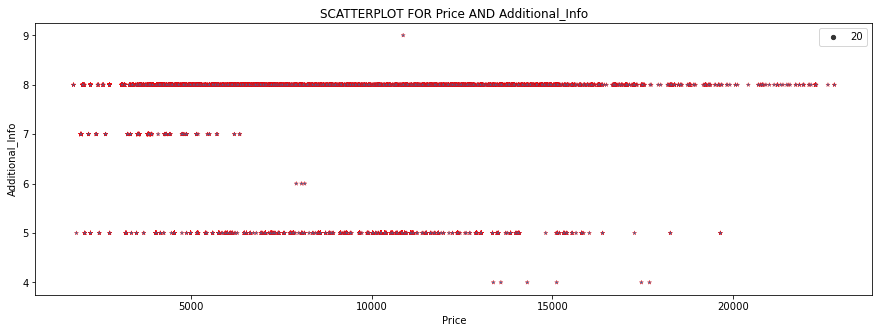

In [49]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Price AND Additional_Info')

sn.scatterplot(new_df['Price'], new_df['Additional_Info'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe Additional_Info type 8 has majority distribution for all Prices